C:\Users\10242\AppData\Local\Temp\ipykernel_29264\876115750.py:45: RuntimeWarning: invalid value encountered in scalar divide
  return (a21 * (a34 * a43 - a33 * a44) + a23 * (a31 * a44 - a41 * a34) + a24 * (a41 * a33 - a31 * a43)) / (a11 * (a34 * a43 - a33 * a44) + a13 * (a31 * a44 - a41 * a34) + a14 * (a41 * a33 - a31 * a43))


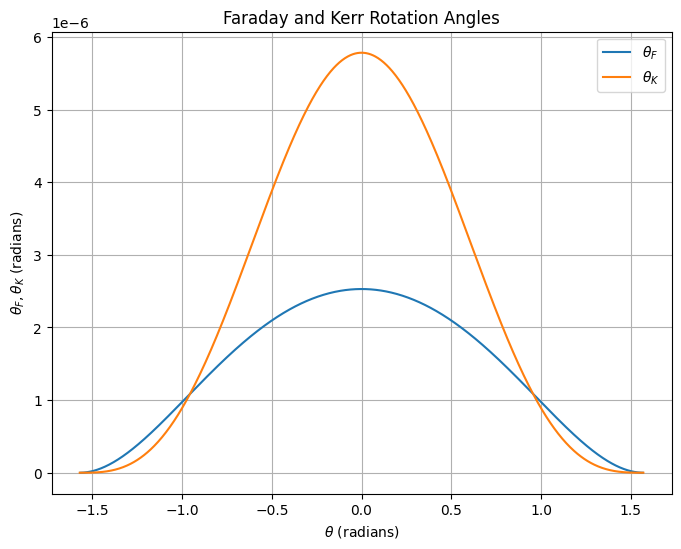

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d = 1e-8

def mu1(theta):
    return np.cos(theta)

def mu2(theta):
    return np.sqrt(10**2 - np.sin(theta)**2)

def mu3(theta):
    return np.sqrt(3.46**2 - np.sin(theta)**2)

def k_prime_d(theta, d):
    return (2 * np.pi * 3e12 / 3e8) * 10**2 * d / np.sqrt(10**2 - np.sin(theta)**2) # thickness is 5nm, frequency is 3THz, refractive index is 10.

def matrix_elements(theta, alpha, d):
    m1, m2, m3 = mu1(theta), mu2(theta), mu3(theta)
    kpd = k_prime_d(theta, d)
    
    a11 = (1 + m1 / m3) * np.cos(kpd) + 1j * (alpha**2 * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a12 = 1j * alpha * (m1 - m3) / (m2 * m3) * np.sin(kpd)
    a13 = (1 - m1 / m3) * np.cos(kpd) + 1j * (alpha**2 * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a14 = -1j * alpha * (m1 + m3) / (m2 * m3) * np.sin(kpd)
    a21 = -1j * alpha * (m1 - m3) / (m2 * m3) * m1**2 * np.sin(kpd)
    a22 = (1 + m1 / m3) * np.cos(kpd) + 1j * (alpha**2 * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a23 = 1j * alpha * (m1 + m3) / (m2 * m3) * m1**2 * np.sin(kpd)
    a24 = (1 - m1 / m3) * np.cos(kpd) + 1j * (alpha**2 * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a31 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-alpha**2 * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a32 = -1j * alpha * (m1 + m3) / (m2 * m3) * np.sin(kpd)
    a33 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-alpha**2 * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a34 = 1j * alpha * (m1 - m3) / (m2 * m3) * np.sin(kpd)
    a41 = 1j * alpha * (m1 + m3) / (m2 * m3) * m1**2 * np.sin(kpd)
    a42 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-alpha**2 * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a43 = 1j * alpha * (-m1 + m3) / (m2 * m3) * m1**2 * np.sin(kpd)
    a44 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-alpha**2 * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    
    return a11, a12, a13, a14, a21, a22, a23, a24, a31, a32, a33, a34, a41, a42, a43, a44

def kerr_function(a41, a33, a31, a43, a44, a34):
    return (a41 * a33 - a31 * a43) / (a31 * a44 - a41 * a34)

def faraday_function(a11, a13, a14, a21, a23, a24, a31, a33, a34, a41, a43, a44):
    return (a21 * (a34 * a43 - a33 * a44) + a23 * (a31 * a44 - a41 * a34) + a24 * (a41 * a33 - a31 * a43)) / (a11 * (a34 * a43 - a33 * a44) + a13 * (a31 * a44 - a41 * a34) + a14 * (a41 * a33 - a31 * a43))

theta_values = np.linspace(-np.pi / 2, np.pi / 2, 1000)
alpha = 7.29735e-3

values_kerr = []
for theta in theta_values:
    elems = matrix_elements(theta, alpha, d)
    tf_value = kerr_function(elems[12], elems[10], elems[8], elems[14], elems[15], elems[11])
    values_kerr.append(abs(tf_value))

values_faraday = []
for theta in theta_values:
    elems = matrix_elements(theta, alpha, d)
    tf_value = faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])
    values_faraday.append(abs(tf_value))

plt.figure(figsize=(8, 6))
plt.plot(theta_values, values_faraday, label=r'$\theta_F$')
plt.plot(theta_values, values_kerr, label=r'$\theta_K$')

plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$\theta_F, \theta_K$ (radians)')
plt.title(r'Faraday and Kerr Rotation Angles')
plt.legend()
plt.grid(True)

plt.show()


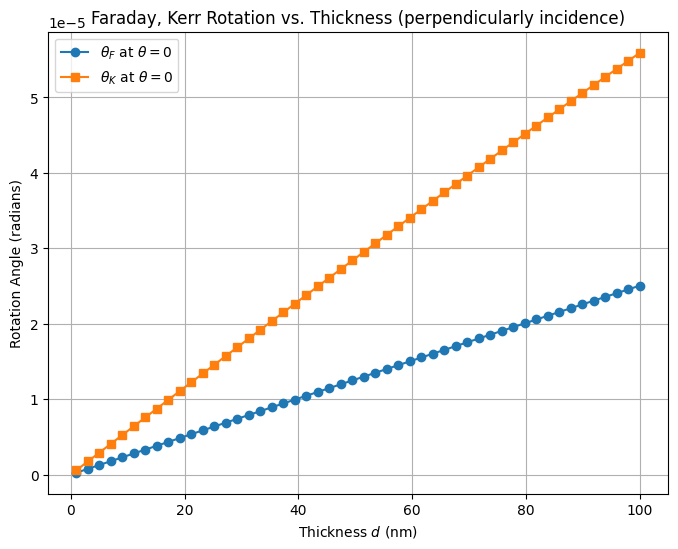

In [2]:
d_values = np.linspace(1e-9, 1e-7, 50)

kerr_values = []
faraday_values = []

theta = 0

for d in d_values:
    elems = matrix_elements(theta, alpha, d)
    kerr_values.append(abs(kerr_function(elems[12], elems[10], elems[8], elems[14], elems[15], elems[11])))
    faraday_values.append(abs(faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])))

plt.figure(figsize=(8, 6))
plt.plot(d_values * 1e9, faraday_values, label=r'$\theta_F$ at $\theta=0$', marker='o')
plt.plot(d_values * 1e9, kerr_values, label=r'$\theta_K$ at $\theta=0$', marker='s')
plt.xlabel('Thickness $d$ (nm)')
plt.ylabel('Rotation Angle (radians)')
plt.title('Faraday, Kerr Rotation vs. Thickness (perpendicularly incidence)')
plt.legend()
plt.grid(True)
plt.show()


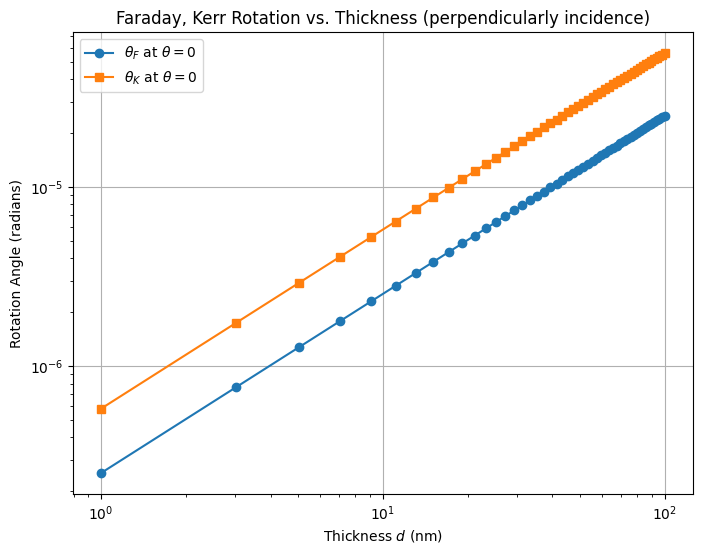

In [3]:
plt.figure(figsize=(8, 6))
plt.loglog(d_values * 1e9, faraday_values, label=r'$\theta_F$ at $\theta=0$', marker='o')
plt.loglog(d_values * 1e9, kerr_values, label=r'$\theta_K$ at $\theta=0$', marker='s')
plt.xlabel('Thickness $d$ (nm)')
plt.ylabel('Rotation Angle (radians)')
plt.title('Faraday, Kerr Rotation vs. Thickness (perpendicularly incidence)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\10242\AppData\Local\Temp\ipykernel_8588\3853008123.py:54: RuntimeWarning: invalid value encountered in scalar divide
  phasediff_kerr.append(np.arctan(tf_value.imag / tf_value.real))
C:\Users\10242\AppData\Local\Temp\ipykernel_8588\3853008123.py:45: RuntimeWarning: invalid value encountered in scalar divide
  return (a21 * (a34 * a43 - a33 * a44) + a23 * (a31 * a44 - a41 * a34) + a24 * (a41 * a33 - a31 * a43)) / (a11 * (a34 * a43 - a33 * a44) + a13 * (a31 * a44 - a41 * a34) + a14 * (a41 * a33 - a31 * a43))


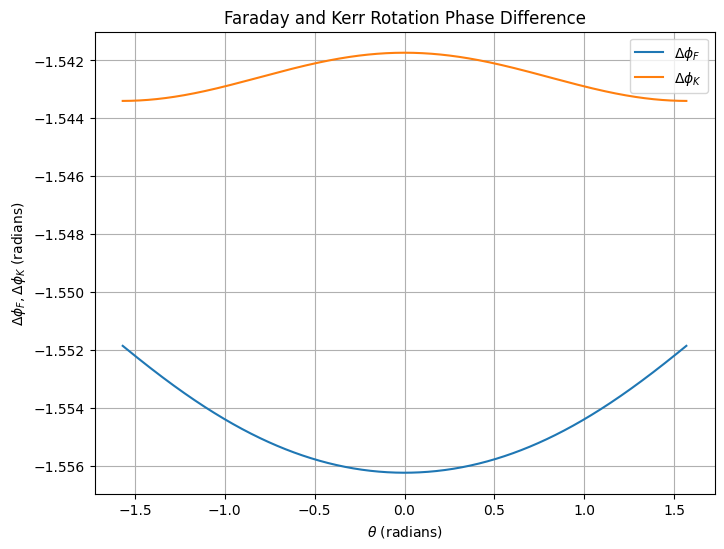

In [8]:
import numpy as np
import matplotlib.pyplot as plt

d = 1e-8

def mu1(theta):
    return np.cos(theta)

def mu2(theta):
    return np.sqrt(10**2 - np.sin(theta)**2)

def mu3(theta):
    return np.sqrt(3.46**2 - np.sin(theta)**2)

def k_prime_d(theta, d):
    return (2 * np.pi * 3e12 / 3e8) * 10**2 * d / np.sqrt(10**2 - np.sin(theta)**2) # thickness is 5nm, frequency is 3THz, refractive index is 10.

def matrix_elements(theta, alpha, d):
    m1, m2, m3 = mu1(theta), mu2(theta), mu3(theta)
    kpd = k_prime_d(theta, d)
    
    a11 = (1 + m1 / m3) * np.cos(kpd) + 1j * (alpha**2 * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a12 = 1j * alpha * (m1 - m3) / (m2 * m3) * np.sin(kpd)
    a13 = (1 - m1 / m3) * np.cos(kpd) + 1j * (alpha**2 * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a14 = -1j * alpha * (m1 + m3) / (m2 * m3) * np.sin(kpd)
    a21 = -1j * alpha * (m1 - m3) / (m2 * m3) * m1**2 * np.sin(kpd)
    a22 = (1 + m1 / m3) * np.cos(kpd) + 1j * (alpha**2 * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a23 = 1j * alpha * (m1 + m3) / (m2 * m3) * m1**2 * np.sin(kpd)
    a24 = (1 - m1 / m3) * np.cos(kpd) + 1j * (alpha**2 * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a31 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-alpha**2 * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a32 = -1j * alpha * (m1 + m3) / (m2 * m3) * np.sin(kpd)
    a33 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-alpha**2 * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a34 = 1j * alpha * (m1 - m3) / (m2 * m3) * np.sin(kpd)
    a41 = 1j * alpha * (m1 + m3) / (m2 * m3) * m1**2 * np.sin(kpd)
    a42 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-alpha**2 * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a43 = 1j * alpha * (-m1 + m3) / (m2 * m3) * m1**2 * np.sin(kpd)
    a44 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-alpha**2 * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    
    return a11, a12, a13, a14, a21, a22, a23, a24, a31, a32, a33, a34, a41, a42, a43, a44

def kerr_function(a41, a33, a31, a43, a44, a34):
    return (a41 * a33 - a31 * a43) / (a31 * a44 - a41 * a34)

def faraday_function(a11, a13, a14, a21, a23, a24, a31, a33, a34, a41, a43, a44):
    return (a21 * (a34 * a43 - a33 * a44) + a23 * (a31 * a44 - a41 * a34) + a24 * (a41 * a33 - a31 * a43)) / (a11 * (a34 * a43 - a33 * a44) + a13 * (a31 * a44 - a41 * a34) + a14 * (a41 * a33 - a31 * a43))

theta_values = np.linspace(-np.pi / 2, np.pi / 2, 1000)
alpha = 7.29735e-3

phasediff_kerr = []
for theta in theta_values:
    elems = matrix_elements(theta, alpha, d)
    tf_value = kerr_function(elems[12], elems[10], elems[8], elems[14], elems[15], elems[11])
    phasediff_kerr.append(np.arctan(tf_value.imag / tf_value.real))

phasediff_faraday = []
for theta in theta_values:
    elems = matrix_elements(theta, alpha, d)
    tf_value = faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])
    phasediff_faraday.append(np.arctan(tf_value.imag / tf_value.real))

plt.figure(figsize=(8, 6))
plt.plot(theta_values, phasediff_faraday, label=r'$\Delta\phi_F$')
plt.plot(theta_values, phasediff_kerr, label=r'$\Delta\phi_K$')

plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$\Delta\phi_F, \Delta\phi_K$ (radians)')
plt.title(r'Faraday and Kerr Rotation Phase Difference')
plt.legend()
plt.grid(True)

plt.show()


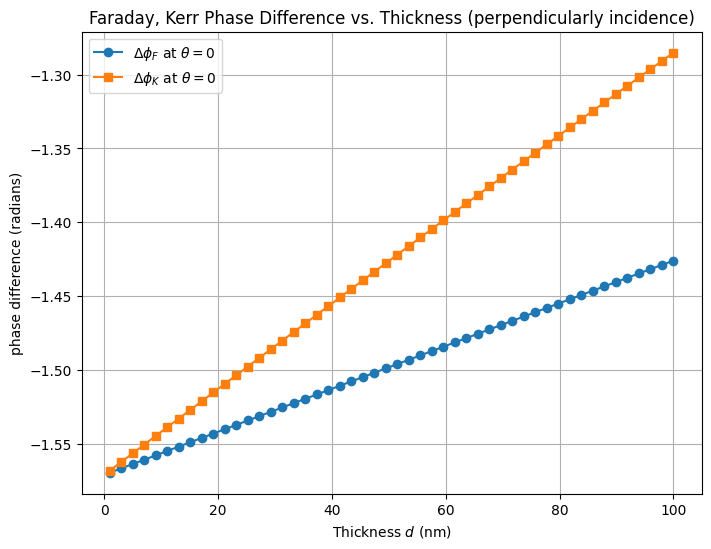

In [5]:
phase_kerr = []
phase_faraday = []

theta = 0

for d in d_values:
    elems = matrix_elements(theta, alpha, d)
    tfk_value = kerr_function(elems[12], elems[10], elems[8], elems[14], elems[15], elems[11])
    tff_value = faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])
    phase_kerr.append(np.arctan(tfk_value.imag / tfk_value.real))
    phase_faraday.append(np.arctan(tff_value.imag / tff_value.real))

plt.figure(figsize=(8, 6))
plt.plot(d_values * 1e9, phase_faraday, label=r'$\Delta\phi_F$ at $\theta=0$', marker='o')
plt.plot(d_values * 1e9, phase_kerr, label=r'$\Delta\phi_K$ at $\theta=0$', marker='s')
plt.xlabel('Thickness $d$ (nm)')
plt.ylabel('phase difference (radians)')
plt.title('Faraday, Kerr Phase Difference vs. Thickness (perpendicularly incidence)')
plt.legend()
plt.grid(True)
plt.show()